# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset

## Importing libraries

In [84]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data Preprocessing

### Training Image preprocessing

In [50]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1951 files belonging to 4 classes.


### Validation Image Preprocessing

In [51]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 253 files belonging to 4 classes.


## Building Model

In [52]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [53]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [54]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [55]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [56]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [57]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [58]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [59]:
cnn.add(tf.keras.layers.Flatten())

In [60]:
cnn.add(tf.keras.layers.Dense(64,activation='relu'))

In [61]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [62]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

<!-- ### Compiling and Training Phase -->

In [63]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                 

In [68]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=25)

Epoch 1/25
61/61 [==============================] - 104s 2s/step - loss: 1.2604 - accuracy: 0.4352 - val_loss: 0.9937 - val_accuracy: 0.5375
Epoch 2/25
61/61 [==============================] - 108s 2s/step - loss: 0.9867 - accuracy: 0.5761 - val_loss: 0.7370 - val_accuracy: 0.7549
Epoch 3/25
61/61 [==============================] - 113s 2s/step - loss: 0.7468 - accuracy: 0.6966 - val_loss: 0.5616 - val_accuracy: 0.8024
Epoch 4/25
61/61 [==============================] - 117s 2s/step - loss: 0.6471 - accuracy: 0.7468 - val_loss: 0.4575 - val_accuracy: 0.8538
Epoch 5/25
61/61 [==============================] - 109s 2s/step - loss: 0.5534 - accuracy: 0.7745 - val_loss: 0.5663 - val_accuracy: 0.7787
Epoch 6/25
61/61 [==============================] - 106s 2s/step - loss: 0.4775 - accuracy: 0.8180 - val_loss: 0.3880 - val_accuracy: 0.8458
Epoch 7/25
61/61 [==============================] - 109s 2s/step - loss: 0.4579 - accuracy: 0.8216 - val_loss: 0.3095 - val_accuracy: 0.8735
Epoch 8/25
61

## Evaluating Model

In [69]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

61/61 [==============================] - 25s 401ms/step - loss: 0.0198 - accuracy: 0.9938
Training accuracy: 0.9938493371009827


In [70]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

8/8 [==============================] - 3s 360ms/step - loss: 0.2168 - accuracy: 0.9526
Validation accuracy: 0.9525691866874695


### Saving Model

In [71]:
cnn.save('trained_plant_disease_model.keras')

In [72]:
training_history.history #Return Dictionary of history

{'loss': [1.2603695392608643,
  0.9867274761199951,
  0.7468147873878479,
  0.6471021771430969,
  0.5534062385559082,
  0.47754034399986267,
  0.45792660117149353,
  0.4146057963371277,
  0.3386434316635132,
  0.2876233160495758,
  0.2829609513282776,
  0.23509174585342407,
  0.256672739982605,
  0.24221360683441162,
  0.2265697568655014,
  0.19314004480838776,
  0.17846141755580902,
  0.16121163964271545,
  0.1666920930147171,
  0.16845382750034332,
  0.12522770464420319,
  0.1377004086971283,
  0.10030748695135117,
  0.0801319107413292,
  0.062300458550453186],
 'accuracy': [0.43516144156455994,
  0.57611483335495,
  0.6965658664703369,
  0.7467964887619019,
  0.7744746208190918,
  0.8180420398712158,
  0.8216299414634705,
  0.8457201719284058,
  0.8677601218223572,
  0.902101457118988,
  0.8949256539344788,
  0.9154279828071594,
  0.9108149409294128,
  0.9092773199081421,
  0.9185033440589905,
  0.9190158843994141,
  0.9272168278694153,
  0.9364428520202637,
  0.9384930729866028,
  

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [74]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

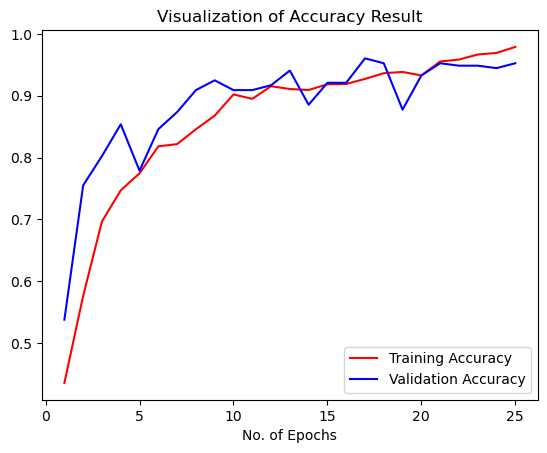

In [75]:
epochs = [i for i in range(1,26)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [38]:
class_name = validation_set.class_names

In [76]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 253 files belonging to 4 classes.


In [77]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

253/253 [==============================] - 4s 17ms/step


In [78]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [79]:
Y_true

<tf.Tensor: shape=(253,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)>

In [80]:
predicted_categories

<tf.Tensor: shape=(253,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)>

In [81]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

### Confusion Matrix Visualization

In [82]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

 diseased cotton leaf       0.98      1.00      0.99        43
diseased cotton plant       0.89      0.99      0.93        78
    fresh cotton leaf       0.98      0.98      0.98        66
   fresh cotton plant       1.00      0.85      0.92        66

             accuracy                           0.95       253
            macro avg       0.96      0.96      0.96       253
         weighted avg       0.96      0.95      0.95       253



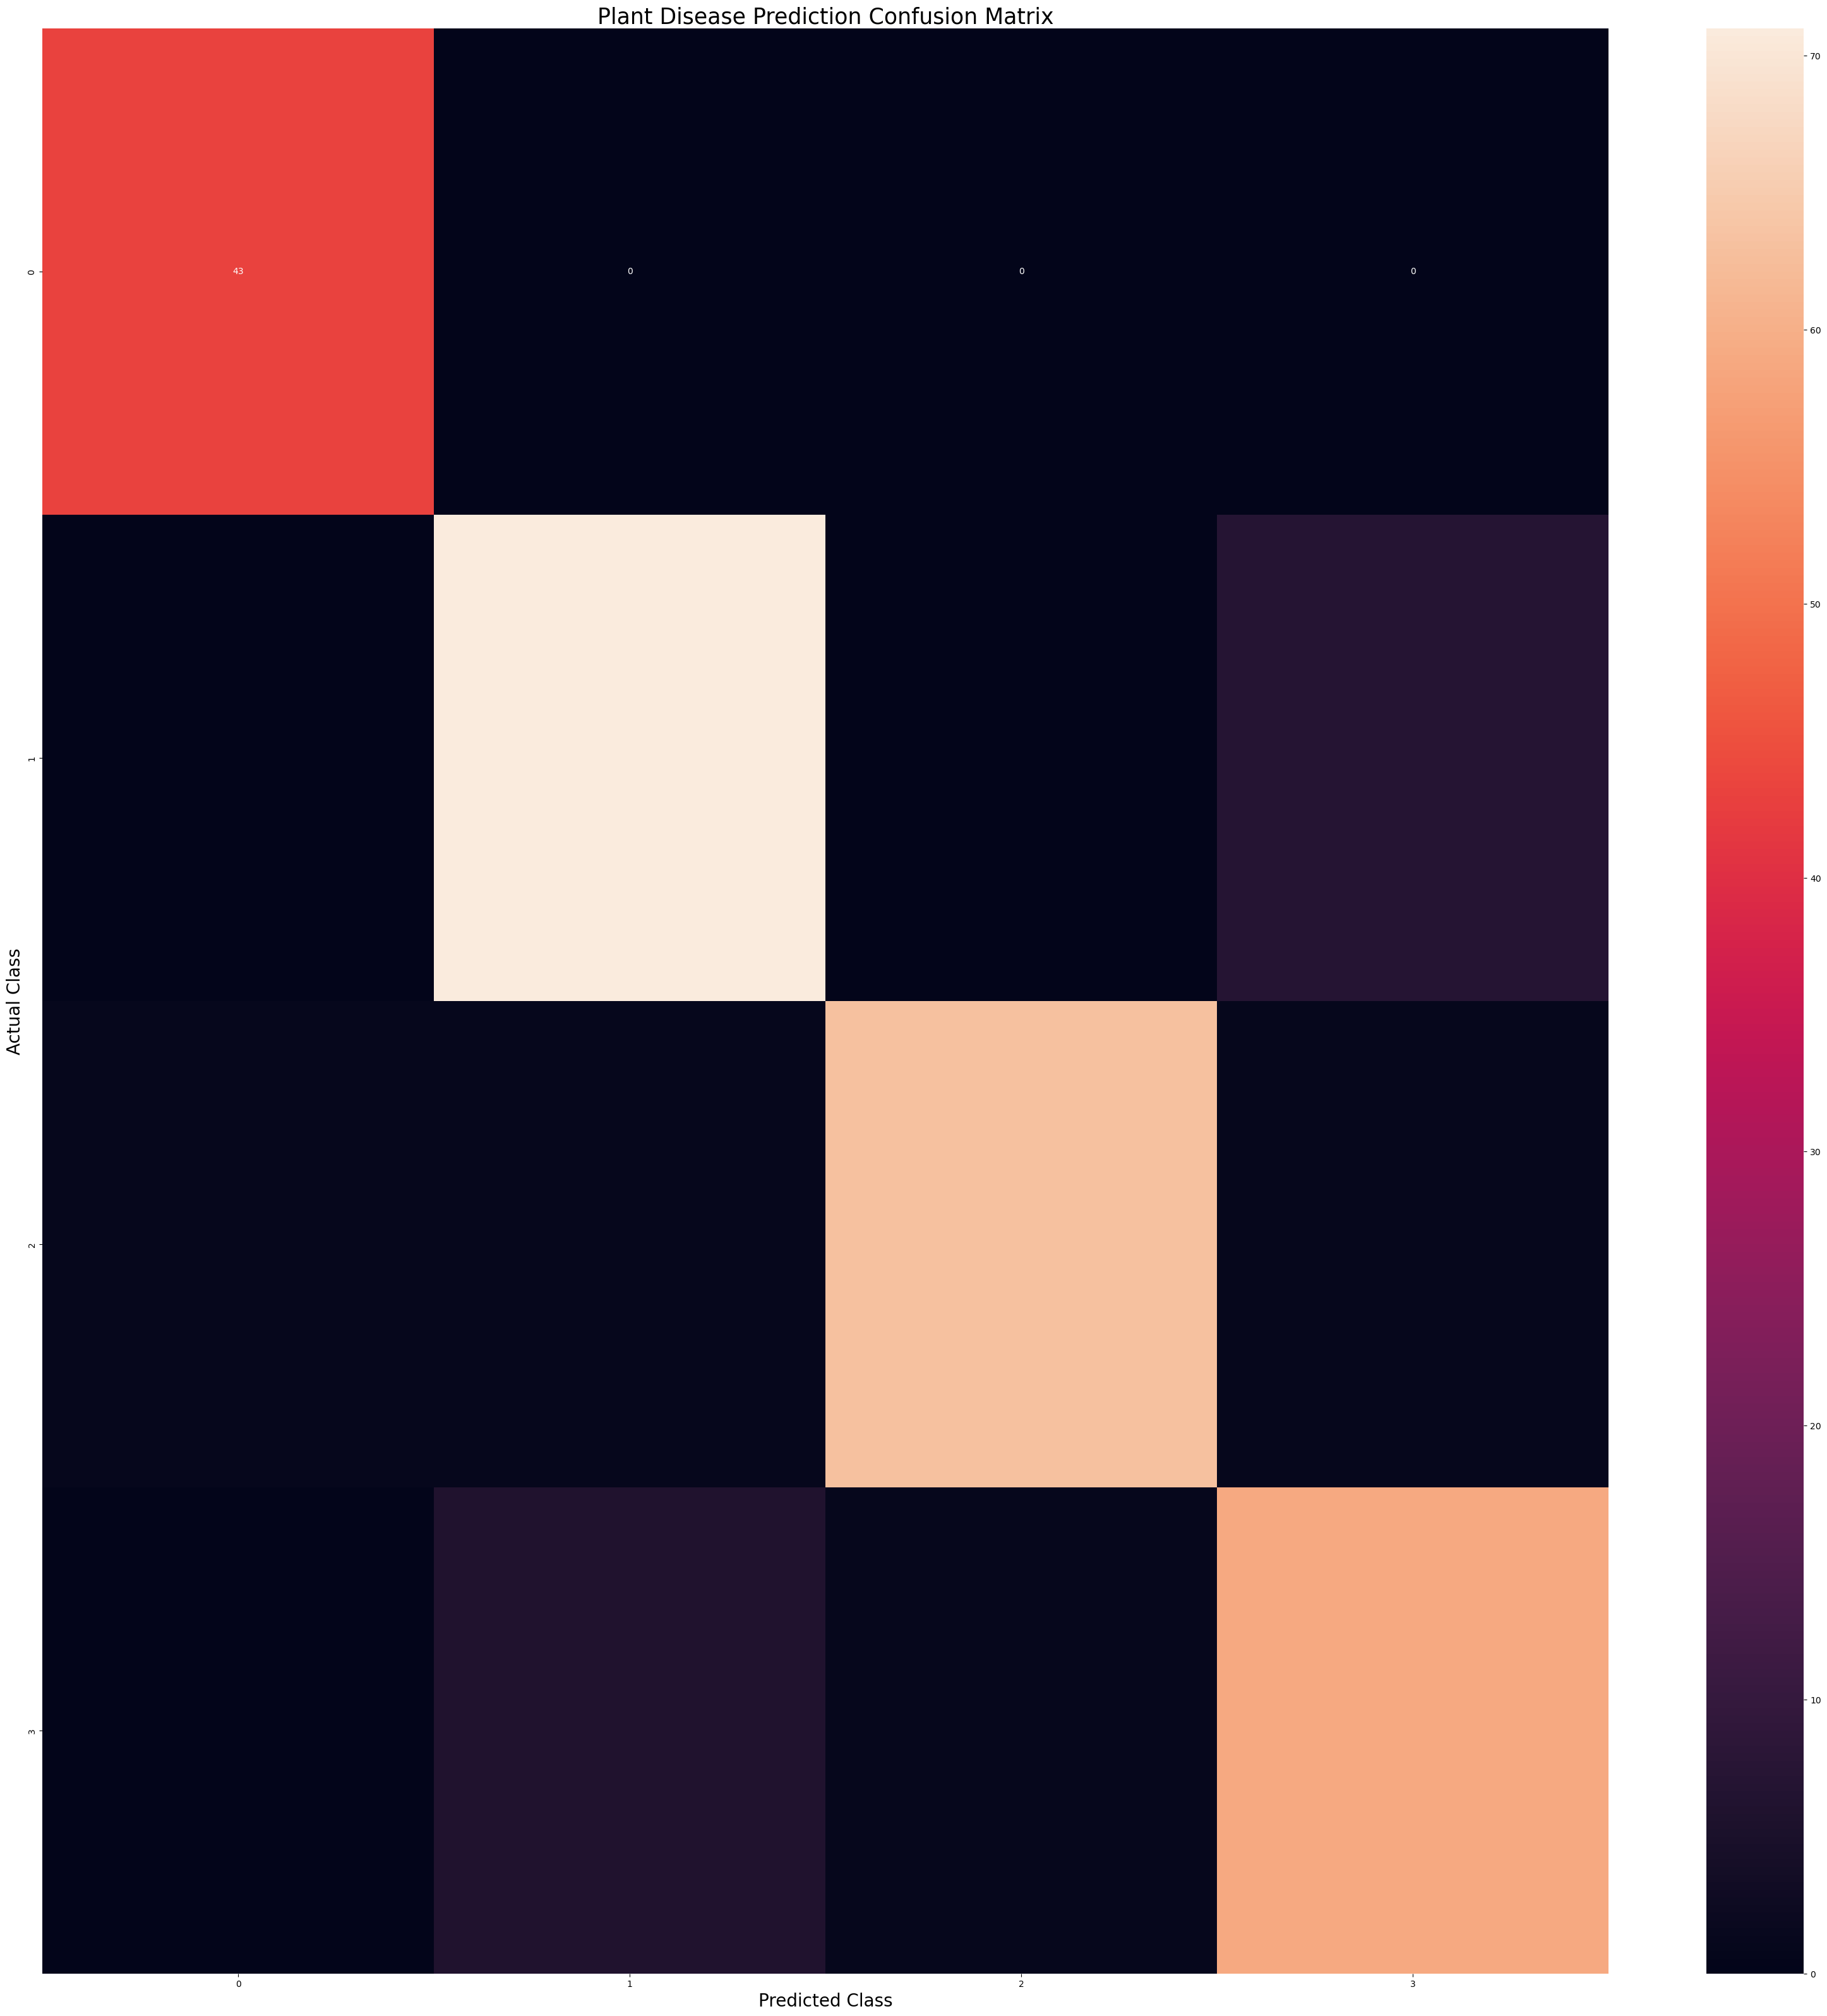

In [47]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()